In [19]:
library(tidyverse)
library(repr)

### In-sample RMSE for linear regression

RMSE is commonly calculated in-sample on your training set. What's a potential drawback to calculating training set error?
* You have no idea how well your model generalizes to new data (i.e. overfitting).

### In-sample RMSE for linear regression on diamonds

As you saw in the video, included in the course is the diamonds dataset, which is a classic dataset from the ggplot2 package. The dataset contains physical attributes of diamonds as well as the price they sold for. One interesting modeling challenge is predicting diamond price based on their attributes using something like a linear regression.

In [3]:
# Fit lm model: model
model <- lm(price ~ ., data = diamonds)

# Predict on full data: p
p <- predict(model)

# Compute errors: error
error <- p - diamonds$price

# Calculate RMSE
sqrt(mean(error^2))

[1] 1129.843

### Out-of-sample RMSE for linear regression

What is the advantage of using a train/test split rather than just validating your model in-sample on the training set?
* It gives you an estimate of how well your model performs on new data.

### Randomly order the data frame

One way you can take a train/test split of a dataset is to order the dataset randomly, then divide it into the two sets. This ensures that the training set and test set are both random samples and that any biases in the ordering of the dataset (e.g. if it had originally been ordered by price or size) are not retained in the samples we take for training and testing your models. You can think of this like shuffling a brand new deck of playing cards before dealing hands.

In [4]:
# Set seed
set.seed(42)

# Shuffle row indices: rows
rows <- sample(nrow(diamonds))
head(rows)

# Randomly order data
diamonds <- diamonds[rows, ]
head(diamonds)

[1] 49345 50545 15434 44792 34614 27998

carat,cut,color,clarity,depth,table,price,x,y,z
0.71,Very Good,H,SI1,62.5,60,2096,5.68,5.75,3.57
0.79,Premium,H,SI1,61.8,59,2275,5.97,5.91,3.67
1.03,Ideal,F,SI1,62.4,57,6178,6.48,6.44,4.03
0.50,Ideal,E,VS2,62.2,54,1624,5.08,5.11,3.17
0.27,Ideal,E,VS1,61.6,56,470,4.14,4.17,2.56
0.30,Premium,E,VS2,61.7,58,658,4.32,4.34,2.67


### Try an 80/20 split

Now that your dataset is randomly ordered, you can split the first 80% of it into a training set, and the last 20% into a test set. You can do this by choosing a split point approximately 80% of the way through your data:

In [5]:
# Determine row to split on: split
split <- round(nrow(diamonds) * .80)
split
# Create train
train <- diamonds[1:split, ]

# Create test
test <- diamonds[(split + 1): nrow(diamonds), ]

[1] 43152

### Predict on test set

Now that you have a randomly split training set and test set, you can use the lm() function as you did in the first exercise to fit a model to your training set, rather than the entire dataset.

In [6]:
# Fit lm model on train: model
model <- lm(price ~ ., data = train) 

# Predict on test: p
p <- predict(model, newdata = test)

### Calculate test set RMSE by hand

Now that you have predictions on the test set, you can use these predictions to calculate an error metric (in this case RMSE) on the test set and see how the model performs out-of-sample, rather than in-sample as you did in the first exercise. You first do this by calculating the errors between the predicted diamond prices and the actual diamond prices by subtracting the predictions from the actual values.

In [7]:
# Compute errors: error
error <- p - test$price

# Calculate RMSE
sqrt(mean(error^2))

[1] 1136.596

### Comparing out-of-sample RMSE to in-sample RMSE

Why is the test set RMSE higher than the training set RMSE?
* Because the test set has a smaller sample size the training set and thus the mean error is lower.

### Advantage of cross-validation

What is the advantage of cross-validation over a single train/test split?
* It gives you multiple estimates of out-of-sample error, rather than a single estimate.  If all of your estimates give similar outputs, you can be more certain of the model's accuracy. If your estimates give different outputs, that tells you the model does not perform consistently and suggests a problem with it.

### 10-fold cross-validation

As you saw in the video, a better approach to validating models is to use multiple systematic test sets, rather than a single random train/test split. Fortunately, the caret package makes this very easy to do:

    model <- train(y ~ ., my_data)

caret supports many types of cross-validation, and you can specify which type of cross-validation and the number of cross-validation folds with the `trainControl()` function, which you pass to the trControl argument in `train()`:

    model <- train(
      y ~ ., my_data,
      method = "lm",
      trControl = trainControl(
        method = "cv", number = 10,
        verboseIter = TRUE
      )
    )

It's important to note that you pass the method for modeling to the main `train()` function and the method for cross-validation to the `trainControl()` function.

In [8]:
library(caret)

# Fit lm model using 10-fold CV: model
model <- train(
  price ~ ., diamonds,
  method = "lm",
  trControl = trainControl(
    method = "cv", number = 10,
    verboseIter = TRUE
  )
)

# Print model to console
model

Loading required package: lattice

Attaching package: 'caret'

The following object is masked from 'package:purrr':

    lift



+ Fold01: intercept=TRUE 
- Fold01: intercept=TRUE 
+ Fold02: intercept=TRUE 
- Fold02: intercept=TRUE 
+ Fold03: intercept=TRUE 
- Fold03: intercept=TRUE 
+ Fold04: intercept=TRUE 
- Fold04: intercept=TRUE 
+ Fold05: intercept=TRUE 
- Fold05: intercept=TRUE 
+ Fold06: intercept=TRUE 
- Fold06: intercept=TRUE 
+ Fold07: intercept=TRUE 
- Fold07: intercept=TRUE 
+ Fold08: intercept=TRUE 
- Fold08: intercept=TRUE 
+ Fold09: intercept=TRUE 
- Fold09: intercept=TRUE 
+ Fold10: intercept=TRUE 
- Fold10: intercept=TRUE 
Aggregating results
Fitting final model on full training set


Linear Regression 

53940 samples
    9 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 48547, 48546, 48546, 48545, 48545, 48545, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  1130.658  0.9197492  740.4646

Tuning parameter 'intercept' was held constant at a value of TRUE

### 5-fold cross-validation

In this course, you will use a wide variety of datasets to explore the full flexibility of the caret package. Here, you will use the famous Boston housing dataset, where the goal is to predict median home values in various Boston suburbs.

You can use exactly the same code as in the previous exercise, but change the dataset used by the model.
Next, you can reduce the number of cross-validation folds from 10 to 5 using the number argument to the trainControl() argument:

    trControl = trainControl(
      method = "cv", number = 5,
      verboseIter = TRUE
    )


In [9]:
library(MASS)
data("Boston")
str(Boston)


Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select



'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [14]:
# Fit lm model using 5-fold CV: model
model <- train(
  medv ~ . , Boston,
  method = "lm",
  trControl = trainControl(
    method = "cv", number = 5,
    verboseIter = TRUE
  )
)

# Print model to console
model

+ Fold1: intercept=TRUE 
- Fold1: intercept=TRUE 
+ Fold2: intercept=TRUE 
- Fold2: intercept=TRUE 
+ Fold3: intercept=TRUE 
- Fold3: intercept=TRUE 
+ Fold4: intercept=TRUE 
- Fold4: intercept=TRUE 
+ Fold5: intercept=TRUE 
- Fold5: intercept=TRUE 
Aggregating results
Fitting final model on full training set


Linear Regression 

506 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 405, 403, 405, 406, 405 
Resampling results:

  RMSE      Rsquared   MAE     
  4.794707  0.7290369  3.372915

Tuning parameter 'intercept' was held constant at a value of TRUE

### 5 x 5-fold cross-validation

You can do more than just one iteration of cross-validation. Repeated cross-validation gives you a better estimate of the test-set error. You can also repeat the entire cross-validation procedure. This takes longer, but gives you many more out-of-sample datasets to look at and much more precise assessments of how well the model performs.

One of the awesome things about the `train()` function in caret is how easy it is to run very different models or methods of cross-validation just by tweaking a few simple arguments to the function call. For example, you could repeat your entire cross-validation procedure 5 times for greater confidence in your estimates of the model's out-of-sample accuracy, e.g.:

In [10]:
# Fit lm model using 5 x 5-fold CV: model
model <- train(
  medv ~ ., Boston,
  method = "lm",
  trControl = trainControl(
    method = "cv", number = 5,
    repeats = 5, verboseIter = TRUE
  )
)

# Print model to console
model

Warning message:
"`repeats` has no meaning for this resampling method."

+ Fold1: intercept=TRUE 
- Fold1: intercept=TRUE 
+ Fold2: intercept=TRUE 
- Fold2: intercept=TRUE 
+ Fold3: intercept=TRUE 
- Fold3: intercept=TRUE 
+ Fold4: intercept=TRUE 
- Fold4: intercept=TRUE 
+ Fold5: intercept=TRUE 
- Fold5: intercept=TRUE 
Aggregating results
Fitting final model on full training set


Linear Regression 

506 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 405, 403, 405, 406, 405 
Resampling results:

  RMSE      Rsquared   MAE     
  4.794707  0.7290369  3.372915

Tuning parameter 'intercept' was held constant at a value of TRUE

### Making predictions on new data

Finally, the model you fit with the `train()` function has the exact same `predict()` interface as the linear regression models you fit earlier in this chapter.

After fitting a model with `train()`, you can simply call `predict()` with new data, e.g:

In [11]:
# Predict on full Boston dataset
predict(model, Boston)

1          2          3          4          5          6          7 
30.0038434 25.0255624 30.5675967 28.6070365 27.9435242 25.2562845 23.0018083 
         8          9         10         11         12         13         14 
19.5359884 11.5236369 18.9202621 18.9994965 21.5867957 20.9065215 19.5529028 
        15         16         17         18         19         20         21 
19.2834821 19.2974832 20.5275098 16.9114013 16.1780111 18.4061360 12.5238575 
        22         23         24         25         26         27         28 
17.6710367 15.8328813 13.8062853 15.6783383 13.3866856 15.4639765 14.7084743 
        29         30         31         32         33         34         35 
19.5473729 20.8764282 11.4551176 18.0592329  8.8110574 14.2827581 13.7067589 
        36         37         38         39         40         41         42 
23.8146353 22.3419371 23.1089114 22.9150261 31.3576257 34.2151023 28.0205641 
        43         44         45         46         47         48         49 
25.2038663 24.6097927 22.9414918 22.0966982 20.4232003 18.0365509  9.1065538 
        50         51         52         53         54         55         56 
17.2060775 21.2815254 23.9722228 27.6558508 24.0490181 15.3618477 31.1526495 
        57         58         59         60         61         62         63 
24.8568698 33.1091981 21.7753799 21.0849356 17.8725804 18.5111021 23.9874286 
        64         65         66         67         68         69         70 
22.5540887 23.3730864 30.3614836 25.5305651 21.1133856 17.4215379 20.7848363 
        71         72         73         74         75         76         77 
25.2014886 21.7426577 24.5574496 24.0429571 25.5049972 23.9669302 22.9454540 
        78         79         80         81         82         83         84 
23.3569982 21.2619827 22.4281737 28.4057697 26.9948609 26.0357630 25.0587348 
        85         86         87         88         89         90         91 
24.7845667 27.7904920 22.1685342 25.8927642 30.6746183 30.8311062 27.1190194 
        92         93         94         95         96         97         98 
27.4126673 28.9412276 29.0810555 27.0397736 28.6245995 24.7274498 35.7815952 
        99        100        101        102        103        104        105 
35.1145459 32.2510280 24.5802202 25.5941347 19.7901368 20.3116713 21.4348259 
       106        107        108        109        110        111        112 
18.5399401 17.1875599 20.7504903 22.6482911 19.7720367 20.6496586 26.5258674 
       113        114        115        116        117        118        119 
20.7732364 20.7154831 25.1720888 20.4302559 23.3772463 23.6904326 20.3357836 
       120        121        122        123        124        125        126 
20.7918087 21.9163207 22.4710778 20.5573856 16.3666198 20.5609982 22.4817845 
       127        128        129        130        131        132        133 
14.6170663 15.1787668 18.9386859 14.0557329 20.0352740 19.4101340 20.0619157 
       134        135        136        137        138        139        140 
15.7580767 13.2564524 17.2627773 15.8784188 19.3616395 13.8148390 16.4488147 
       141        142        143        144        145        146        147 
13.5714193  3.9888551 14.5949548 12.1488148  8.7282236 12.0358534 15.8208206 
       148        149        150        151        152        153        154 
 8.5149902  9.7184414 14.8045137 20.8385815 18.3010117 20.1228256 17.2860189 
       155        156        157        158        159        160        161 
22.3660023 20.1037592 13.6212589 33.2598270 29.0301727 25.5675277 32.7082767 
       162        163        164        165        166        167        168 
36.7746701 40.5576584 41.8472817 24.7886738 25.3788924 37.2034745 23.0874875 
       169        170        171        172        173        174        175 
26.4027396 26.6538211 22.5551466 24.2908281 22.9765722 29.0719431 26.5219434 
       176        177        178        179        180        181        182 
30.7220906 25.6166931 29.137409

### Why a train/test split?

What is the point of making a train/test split for binary classification problems?
* To evaluate your models out-of-sample, on new data.

### Try a 60/40 split

As you saw in the video, you'll be working with the Sonar dataset in this chapter, using a 60% training set and a 40% test set. We'll practice making a train/test split one more time, just to be sure you have the hang of it. Recall that you can use the `sample()` function to get a random permutation of the row indices in a dataset, to use when making train/test splits, e.g.:

    rows <- sample(nrow(my_data))

And then use those row indices to randomly reorder the dataset, e.g.:

    my_data <- my_data[rows, ]

Once your dataset is randomly ordered, you can split off the first 60% as a training set and the last 40% as a test set.

In [88]:
Sonar <- load("Sonar.rdata")

head(sonar_train, 2)
summary(sonar_train$Class)
head(sonar_test, 2)
summary(sonar_test$Class)

Sonar <- rbind(sonar_train, sonar_test)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
191,0.0156,0.0210,0.0282,0.0596,0.0462,0.0779,0.1365,0.0780,0.1038,0.1567,...,0.0150,0.0060,0.0082,0.0091,0.0038,0.0056,0.0056,0.0048,0.0024,M
194,0.0203,0.0121,0.0380,0.0128,0.0537,0.0874,0.1021,0.0852,0.1136,0.1747,...,0.0134,0.0094,0.0047,0.0045,0.0042,0.0028,0.0036,0.0013,0.0016,M


M  R 
63 62

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
190,0.0158,0.0239,0.0150,0.0494,0.0988,0.1425,0.1463,0.1219,0.1697,0.1923,...,0.0121,0.0108,0.0057,0.0028,0.0079,0.0034,0.0046,0.0022,0.0021,M
102,0.0335,0.0134,0.0696,0.1180,0.0348,0.1180,0.1948,0.1607,0.3036,0.4372,...,0.0244,0.0232,0.0093,0.0159,0.0193,0.0032,0.0377,0.0126,0.0156,M


M  R 
48 35

### Fit a logistic regression model

Once you have your random training and test sets you can fit a logistic regression model to your training set using the `glm()` function. `glm()` is a more advanced version of `lm()` that allows for more varied types of regression models, aside from plain vanilla ordinary least squares regression.

Be sure to pass the argument family = "binomial" to `glm()` to specify that you want to do logistic (rather than linear) regression. For example:

    glm(Target ~ ., family = "binomial", dataset)

Don't worry about warnings like glm.fit: algorithm did not converge or glm.fit: fitted probabilities numerically 0 or 1 occurred. These are common on smaller datasets and usually don't cause any issues. They typically mean your dataset is perfectly separable, which can cause problems for the math behind the model, but R's glm() function is almost always robust enough to handle this case with no problems.

Once you have a glm() model fit to your dataset, you can predict the outcome (e.g. rock or mine) on the test set using the predict() function with the argument type = "response":

    predict(my_model, test, type = "response")


In [69]:
sonar_train$Class <- ifelse(sonar_train$Class == "M", 1, 0)
str(sonar_train)

'data.frame':	125 obs. of  61 variables:
 $ V1   : num  0.0156 0.0203 0.0225 0.0134 0.0443 0.0116 0.0712 0.0177 0.115 0.0412 ...
 $ V2   : num  0.021 0.0121 0.0019 0.0172 0.0446 ...
 $ V3   : num  0.0282 0.038 0.0075 0.0178 0.0235 ...
 $ V4   : num  0.0596 0.0128 0.0097 0.0363 0.1008 ...
 $ V5   : num  0.0462 0.0537 0.0445 0.0444 0.2252 ...
 $ V6   : num  0.0779 0.0874 0.0906 0.0744 0.2611 ...
 $ V7   : num  0.1365 0.1021 0.0889 0.08 0.2061 ...
 $ V8   : num  0.078 0.0852 0.0655 0.0456 0.1668 ...
 $ V9   : num  0.1038 0.1136 0.1624 0.0368 0.1801 ...
 $ V10  : num  0.157 0.175 0.145 0.125 0.308 ...
 $ V11  : num  0.248 0.22 0.144 0.24 0.379 ...
 $ V12  : num  0.2783 0.2721 0.0948 0.2325 0.5364 ...
 $ V13  : num  0.2896 0.2105 0.0618 0.2523 0.6173 ...
 $ V14  : num  0.296 0.173 0.164 0.147 0.784 ...
 $ V15  : num  0.3189 0.204 0.0708 0.0669 0.8392 ...
 $ V16  : num  0.1892 0.1786 0.0844 0.11 0.9016 ...
 $ V17  : num  0.173 0.132 0.259 0.235 1 ...
 $ V18  : num  0.223 0.226 0.268 0.328 0.

In [73]:
# Fit glm model: model
model <- glm(Class ~ . ,family = "binomial", data = sonar_train)

# Predict on test: p
p <- predict(model, newdata = sonar_test, type = "response")

Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

### Confusion matrix takeaways

What information does a confusion matrix provide?
* True positive rates
* True negative rates
* False positive rates
* False negative rates

### Calculate a confusion matrix

As you saw in the video, a confusion matrix is a very useful tool for calibrating the output of a model and examining all possible outcomes of your predictions (true positive, true negative, false positive, false negative).

Before you make your confusion matrix, you need to "cut" your predicted probabilities at a given threshold to turn probabilities into a factor of class predictions. Combine `ifelse()` with `factor()` as follows:

    pos_or_neg <- ifelse(probability_prediction > threshold, positive_class, negative_class)
    p_class <- factor(pos_or_neg, levels = levels(test_values))

`confusionMatrix()` in caret improves on `table()` from base R by adding lots of useful ancillary statistics in addition to the base rates in the table. You can calculate the confusion matrix (and the associated statistics) using the predicted outcomes as well as the actual outcomes, e.g.:

    confusionMatrix(p_class, test_values)

In [74]:
# If p exceeds threshold of 0.5, M else R: m_or_r
m_or_r <- ifelse(p > 0.5, "M", "R")

# Convert to factor: p_class
p_class <- factor(m_or_r, levels = levels(sonar_test[["Class"]]))

# Create confusion matrix
confusionMatrix(p_class, sonar_test$Class)

Confusion Matrix and Statistics

          Reference
Prediction  M  R
         M 40 17
         R  8 18
                                          
               Accuracy : 0.6988          
                 95% CI : (0.5882, 0.7947)
    No Information Rate : 0.5783          
    P-Value [Acc > NIR] : 0.01616         
                                          
                  Kappa : 0.3602          
 Mcnemar's Test P-Value : 0.10960         
                                          
            Sensitivity : 0.8333          
            Specificity : 0.5143          
         Pos Pred Value : 0.7018          
         Neg Pred Value : 0.6923          
             Prevalence : 0.5783          
         Detection Rate : 0.4819          
   Detection Prevalence : 0.6867          
      Balanced Accuracy : 0.6738          
                                          
       'Positive' Class : M               
                                          

What is the test set true positive rate (or sensitivity) of this model (rounded to the nearest percent)?
* 17%

What is the test set true negative rate (or specificity) of this model (rounded to the nearest percent)?
* 49%

### Probabilities and classes

What's the relationship between the predicted probabilities and the predicted classes?
* Predicted classes are based off of predicted probabilities plus a classification threshold.

### Try another threshold

In the previous exercises, you used a threshold of 0.50 to cut your predicted probabilities to make class predictions (rock vs mine). However, this classification threshold does not always align with the goals for a given modeling problem.

For example, pretend you want to identify the objects you are really certain are mines. In this case, you might want to use a probability threshold of 0.90 to get fewer predicted mines, but with greater confidence in each prediction.

In [75]:
# If p exceeds threshold of 0.9, M else R: m_or_r
m_or_r <- ifelse(p > 0.9, "M", "R")

# Convert to factor: p_class
p_class <- factor(m_or_r, levels = levels(sonar_test[["Class"]]))

# Create confusion matrix
confusionMatrix(p_class, sonar_test$Class)

Confusion Matrix and Statistics

          Reference
Prediction  M  R
         M 40 15
         R  8 20
                                          
               Accuracy : 0.7229          
                 95% CI : (0.6138, 0.8155)
    No Information Rate : 0.5783          
    P-Value [Acc > NIR] : 0.004583        
                                          
                  Kappa : 0.416           
 Mcnemar's Test P-Value : 0.210903        
                                          
            Sensitivity : 0.8333          
            Specificity : 0.5714          
         Pos Pred Value : 0.7273          
         Neg Pred Value : 0.7143          
             Prevalence : 0.5783          
         Detection Rate : 0.4819          
   Detection Prevalence : 0.6627          
      Balanced Accuracy : 0.7024          
                                          
       'Positive' Class : M               
                                          

### From probabilites to confusion matrix

Conversely, say you want to be really certain that your model correctly identifies all the mines as mines. In this case, you might use a prediction threshold of 0.10, instead of 0.90.

In [77]:
# If p exceeds threshold of 0.1, M else R: m_or_r
m_or_r <- ifelse(p > 0.1, "M", "R")

# Convert to factor: p_class
p_class <- factor(m_or_r, levels = levels(sonar_test$Class))

# Create confusion matrix
confusionMatrix(p_class, sonar_test$Class)

Confusion Matrix and Statistics

          Reference
Prediction  M  R
         M 40 18
         R  8 17
                                          
               Accuracy : 0.6867          
                 95% CI : (0.5756, 0.7841)
    No Information Rate : 0.5783          
    P-Value [Acc > NIR] : 0.02806         
                                          
                  Kappa : 0.3319          
 Mcnemar's Test P-Value : 0.07756         
                                          
            Sensitivity : 0.8333          
            Specificity : 0.4857          
         Pos Pred Value : 0.6897          
         Neg Pred Value : 0.6800          
             Prevalence : 0.5783          
         Detection Rate : 0.4819          
   Detection Prevalence : 0.6988          
      Balanced Accuracy : 0.6595          
                                          
       'Positive' Class : M               
                                          

Note that there are (slightly) more predicted mines with this lower threshold: 58 (40 + 18) as compared to 47 for the 0.50 threshold. 

### What's the value of a ROC curve?

What is the primary value of an ROC curve?
* It evaluates all possible thresholds for splitting predicted probabilities into predicted classes.

### Plot an ROC curve

As you saw in the video, an ROC curve is a really useful shortcut for summarizing the performance of a classifier over all possible thresholds. This saves you a lot of tedious work computing class predictions for many different thresholds and examining the confusion matrix for each.

My favorite package for computing ROC curves is caTools, which contains a function called `colAUC()* . This function is very user-friendly and can actually calculate ROC curves for multiple predictors at once. In this case, you only need to calculate the ROC curve for one predictor, e.g.:

    colAUC(predicted_probabilities, actual, plotROC = TRUE)

The function will return a score called AUC (more on that later) and the `plotROC = TRUE` argument will return the plot of the ROC curve for visual inspection.

M vs. R,0.7452381


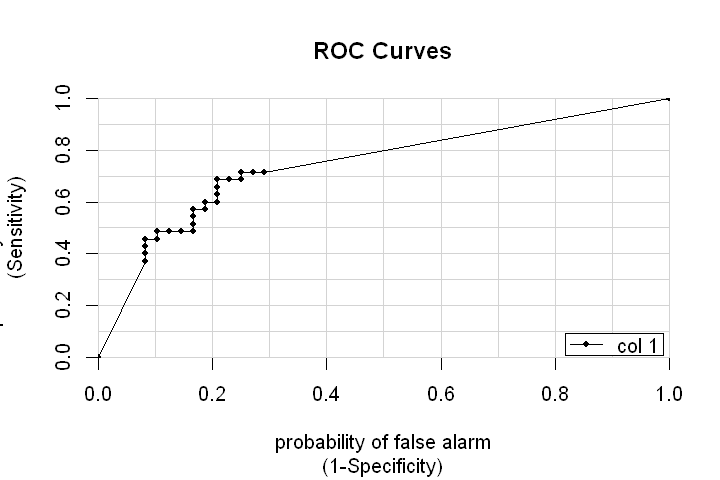

In [80]:
library(caTools)
# Predict on test: p
p <- predict(model, sonar_test, type = "response")

# Make ROC curve
colAUC(p, sonar_test$Class, plotROC = TRUE)

### Model, ROC, and AUC

What is the AUC of a perfect model?
* 1

### Customizing trainControl

As you saw in the video, area under the ROC curve is a very useful, single-number summary of a model's ability to discriminate the positive from the negative class (e.g. mines from rocks). An AUC of 0.5 is no better than random guessing, an AUC of 1.0 is a perfectly predictive model, and an AUC of 0.0 is perfectly anti-predictive (which rarely happens).

This is often a much more useful metric than simply ranking models by their accuracy at a set threshold, as different models might require different calibration steps (looking at a confusion matrix at each step) to find the optimal classification threshold for that model.

You can use the `trainControl()` function in caret to use AUC (instead of acccuracy), to tune the parameters of your models. The `twoClassSummary()` convenience function allows you to do this easily.

When using `twoClassSummary()`, be sure to always include the argument `classProbs = TRUE` or your model will throw an error! (You cannot calculate AUC with just class predictions. You need to have class probabilities as well.)

In [81]:
# Create trainControl object: myControl
myControl <- trainControl(
  method = "cv",
  number = 10,
  summaryFunction = twoClassSummary,
  classProbs = TRUE, # IMPORTANT!
  verboseIter = TRUE
)

### Using custom trainControl

Now that you have a custom trainControl object, it's easy to fit caret models that use AUC rather than accuracy to tune and evaluate the model. You can just pass your custom trainControl object to the `train()` function via the trControl argument, e.g.:

    train(<standard arguments here>, trControl = myControl)
    
This syntax gives you a convenient way to store a lot of custom modeling parameters and then use them across multiple different calls to `train()`. 


In [89]:
# Train glm with custom trainControl: model
model <- train(Class ~ . , Sonar, method = "glm", trControl = myControl)


# Print model to console
model

Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."

+ Fold01: parameter=none 


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

- Fold01: parameter=none 
+ Fold02: parameter=none 


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

- Fold02: parameter=none 
+ Fold03: parameter=none 


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

- Fold03: parameter=none 
+ Fold04: parameter=none 


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

- Fold04: parameter=none 
+ Fold05: parameter=none 


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

- Fold05: parameter=none 
+ Fold06: parameter=none 


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

- Fold06: parameter=none 
+ Fold07: parameter=none 


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

- Fold07: parameter=none 
+ Fold08: parameter=none 


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

- Fold08: parameter=none 
+ Fold09: parameter=none 


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

- Fold09: parameter=none 
+ Fold10: parameter=none 


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

- Fold10: parameter=none 
Aggregating results
Fitting final model on full training set


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Generalized Linear Model 

208 samples
 60 predictor
  2 classes: 'M', 'R' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 188, 187, 187, 186, 187, 188, ... 
Resampling results:

  ROC        Sens       Spec     
  0.7130934  0.6924242  0.6877778


### Random forests vs. linear models

What's the primary advantage of random forests over linear models?
* A random forest is a more flexible model than a linear model, but just as easy to fit.

### Fit a random forest

As you saw in the video, random forest models are much more flexible than linear models, and can model complicated nonlinear effects as well as automatically capture interactions between variables. They tend to give very good results on real world data, so let's try one out on the wine quality dataset, where the goal is to predict the human-evaluated quality of a batch of wine, given some of the machine-measured chemical and physical properties of that batch.

Fitting a random forest model is exactly the same as fitting a generalized linear regression model, as you did in the previous chapter. You simply change the method argument in the train function to be "ranger". The ranger package is a rewrite of R's classic randomForest package and fits models much faster, but gives almost exactly the same results. We suggest that all beginners use the ranger package for random forest modeling.

In [91]:
wine <- read_rds("wine_100.rds")

In [92]:
str(wine)

'data.frame':	100 obs. of  13 variables:
 $ fixed.acidity       : num  6.7 6.7 5.8 6.3 6.6 7.8 5.5 9.1 6.2 8 ...
 $ volatile.acidity    : num  0.27 0.48 0.36 0.32 0.24 0.39 0.12 0.21 0.21 0.14 ...
 $ citric.acid         : num  0.69 0.49 0.38 0.26 0.28 0.26 0.33 0.37 0.34 0.33 ...
 $ residual.sugar      : num  1.2 2.9 0.9 12 1.8 9.9 1 1.6 6.6 1.2 ...
 $ chlorides           : num  0.176 0.03 0.037 0.049 0.028 0.059 0.038 0.067 0.03 0.045 ...
 $ free.sulfur.dioxide : num  36 28 3 63 39 33 23 6 36 71 ...
 $ total.sulfur.dioxide: num  106 122 75 170 132 181 131 10 91 162 ...
 $ density             : num  0.993 0.989 0.99 0.996 0.992 ...
 $ pH                  : num  2.96 3.13 3.28 3.14 3.34 3.04 3.25 3.23 3.32 3.07 ...
 $ sulphates           : num  0.43 0.4 0.34 0.55 0.46 0.42 0.45 0.58 0.45 0.47 ...
 $ alcohol             : num  9.2 13 11.4 9.9 11.4 10.9 9.8 11.1 12.5 11 ...
 $ quality             : int  6 6 4 6 5 6 5 7 7 6 ...
 $ color               : Factor w/ 2 levels "red","white": 2 2

In [93]:
# Fit random forest: model
model <- train(
  quality ~ .,
  tuneLength = 1,
  data = wine,  method = "ranger",
  trControl = trainControl(method = "cv", number = 5, verboseIter = TRUE)
)

# Print model to console
model


+ Fold1: mtry=3, min.node.size=5, splitrule=variance 
- Fold1: mtry=3, min.node.size=5, splitrule=variance 
+ Fold1: mtry=3, min.node.size=5, splitrule=extratrees 
- Fold1: mtry=3, min.node.size=5, splitrule=extratrees 
+ Fold2: mtry=3, min.node.size=5, splitrule=variance 
- Fold2: mtry=3, min.node.size=5, splitrule=variance 
+ Fold2: mtry=3, min.node.size=5, splitrule=extratrees 
- Fold2: mtry=3, min.node.size=5, splitrule=extratrees 
+ Fold3: mtry=3, min.node.size=5, splitrule=variance 
- Fold3: mtry=3, min.node.size=5, splitrule=variance 
+ Fold3: mtry=3, min.node.size=5, splitrule=extratrees 
- Fold3: mtry=3, min.node.size=5, splitrule=extratrees 
+ Fold4: mtry=3, min.node.size=5, splitrule=variance 
- Fold4: mtry=3, min.node.size=5, splitrule=variance 
+ Fold4: mtry=3, min.node.size=5, splitrule=extratrees 
- Fold4: mtry=3, min.node.size=5, splitrule=extratrees 
+ Fold5: mtry=3, min.node.size=5, splitrule=variance 
- Fold5: mtry=3, min.node.size=5, splitrule=variance 
+ Fold5: mtr

Random Forest 

100 samples
 12 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 79, 81, 80, 80, 80 
Resampling results across tuning parameters:

  splitrule   RMSE       Rsquared   MAE      
  variance    0.6470478  0.3004669  0.5110721
  extratrees  0.6837132  0.2311434  0.5229462

Tuning parameter 'mtry' was held constant at a value of 3
Tuning
 parameter 'min.node.size' was held constant at a value of 5
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were mtry = 3, splitrule = variance
 and min.node.size = 5.

### Advantage of a longer tune length

What's the advantage of a longer tuneLength?
* You explore more potential models and can potentially find a better model.

### Try a longer tune length

Recall from the video that random forest models have a primary tuning parameter of mtry, which controls how many variables are exposed to the splitting search routine at each split. For example, suppose that a tree has a total of 10 splits and mtry = 2. This means that there are 10 samples of 2 predictors each time a split is evaluated.

Use a larger tuning grid this time, but stick to the defaults provided by the `train()` function. Try a tuneLength of 3, rather than 1, to explore some more potential models, and plot the resulting model using the plot function.

In [95]:
# Fit random forest: model
model <- train(
  quality ~ . ,
  tuneLength = 3,
  data = wine, method = "ranger",
  trControl = trainControl(method = "cv", number = 5, verboseIter = TRUE)
)


+ Fold1: mtry= 2, min.node.size=5, splitrule=variance 
- Fold1: mtry= 2, min.node.size=5, splitrule=variance 
+ Fold1: mtry= 7, min.node.size=5, splitrule=variance 
- Fold1: mtry= 7, min.node.size=5, splitrule=variance 
+ Fold1: mtry=12, min.node.size=5, splitrule=variance 
- Fold1: mtry=12, min.node.size=5, splitrule=variance 
+ Fold1: mtry= 2, min.node.size=5, splitrule=extratrees 
- Fold1: mtry= 2, min.node.size=5, splitrule=extratrees 
+ Fold1: mtry= 7, min.node.size=5, splitrule=extratrees 
- Fold1: mtry= 7, min.node.size=5, splitrule=extratrees 
+ Fold1: mtry=12, min.node.size=5, splitrule=extratrees 
- Fold1: mtry=12, min.node.size=5, splitrule=extratrees 
+ Fold2: mtry= 2, min.node.size=5, splitrule=variance 
- Fold2: mtry= 2, min.node.size=5, splitrule=variance 
+ Fold2: mtry= 7, min.node.size=5, splitrule=variance 
- Fold2: mtry= 7, min.node.size=5, splitrule=variance 
+ Fold2: mtry=12, min.node.size=5, splitrule=variance 
- Fold2: mtry=12, min.node.size=5, splitrule=variance

Random Forest 

100 samples
 12 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 81, 79, 80, 80, 80 
Resampling results across tuning parameters:

  mtry  splitrule   RMSE       Rsquared   MAE      
   2    variance    0.6690661  0.2599893  0.4968742
   2    extratrees  0.6919334  0.2070825  0.5139082
   7    variance    0.6736951  0.2347155  0.5044623
   7    extratrees  0.6833274  0.2054887  0.5118286
  12    variance    0.6770627  0.2304739  0.5096112
  12    extratrees  0.6863720  0.1945324  0.5176281

Tuning parameter 'min.node.size' was held constant at a value of 5
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were mtry = 2, splitrule = variance
 and min.node.size = 5.

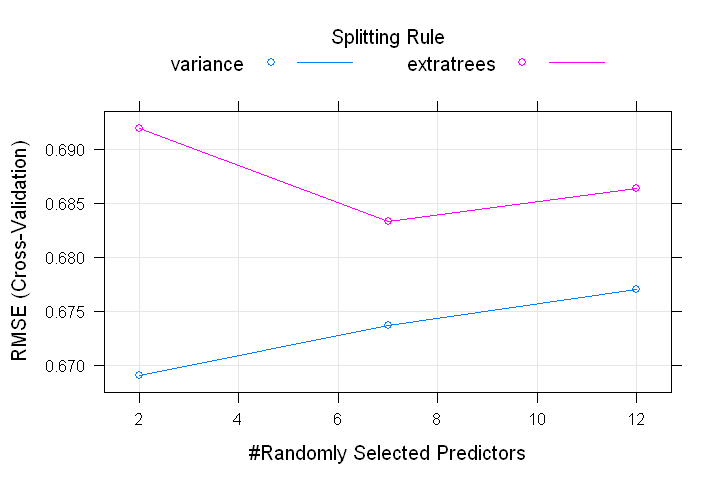

In [96]:
# Print model to console
model

# Plot model
plot(model)

### Advantages of a custom tuning grid

Why use a custom tuneGrid?
* It gives you more fine-grained control over the tuning parameters that are explored.

### Fit a random forest with custom tuning

Now that you've explored the default tuning grids provided by the train() function, let's customize your models a bit more.

You can provide any number of values for mtry, from 2 up to the number of columns in the dataset. In practice, there are diminishing returns for much larger values of mtry, so you will use a custom tuning grid that explores 2 simple models (mtry = 2 and mtry = 3) as well as one more complicated model (mtry = 7).
Set the number of variables to possibly split at each node, .mtry, to a vector of 2, 3, and 7.

In [98]:
# Define the tuning grid: tuneGrid
tuneGrid <- data.frame(
  .mtry = c(2,3, 7),
  .splitrule = "variance",
  .min.node.size = 5
)

# Fit random forest: model
model <- train(
  quality ~ .,
  tuneGrid = tuneGrid,
  data = wine, 
  method = "ranger",
  trControl = trainControl(method = "cv", number = 5, verboseIter = TRUE)
)


+ Fold1: mtry=2, splitrule=variance, min.node.size=5 
- Fold1: mtry=2, splitrule=variance, min.node.size=5 
+ Fold1: mtry=3, splitrule=variance, min.node.size=5 
- Fold1: mtry=3, splitrule=variance, min.node.size=5 
+ Fold1: mtry=7, splitrule=variance, min.node.size=5 
- Fold1: mtry=7, splitrule=variance, min.node.size=5 
+ Fold2: mtry=2, splitrule=variance, min.node.size=5 
- Fold2: mtry=2, splitrule=variance, min.node.size=5 
+ Fold2: mtry=3, splitrule=variance, min.node.size=5 
- Fold2: mtry=3, splitrule=variance, min.node.size=5 
+ Fold2: mtry=7, splitrule=variance, min.node.size=5 
- Fold2: mtry=7, splitrule=variance, min.node.size=5 
+ Fold3: mtry=2, splitrule=variance, min.node.size=5 
- Fold3: mtry=2, splitrule=variance, min.node.size=5 
+ Fold3: mtry=3, splitrule=variance, min.node.size=5 
- Fold3: mtry=3, splitrule=variance, min.node.size=5 
+ Fold3: mtry=7, splitrule=variance, min.node.size=5 
- Fold3: mtry=7, splitrule=variance, min.node.size=5 
+ Fold4: mtry=2, splitrule=v

Random Forest 

100 samples
 12 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 80, 80, 80, 80, 80 
Resampling results across tuning parameters:

  mtry  RMSE       Rsquared   MAE      
  2     0.6395336  0.3693696  0.4763893
  3     0.6329337  0.3735120  0.4716450
  7     0.6238573  0.3785370  0.4698560

Tuning parameter 'splitrule' was held constant at a value of variance

Tuning parameter 'min.node.size' was held constant at a value of 5
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were mtry = 7, splitrule = variance
 and min.node.size = 5.

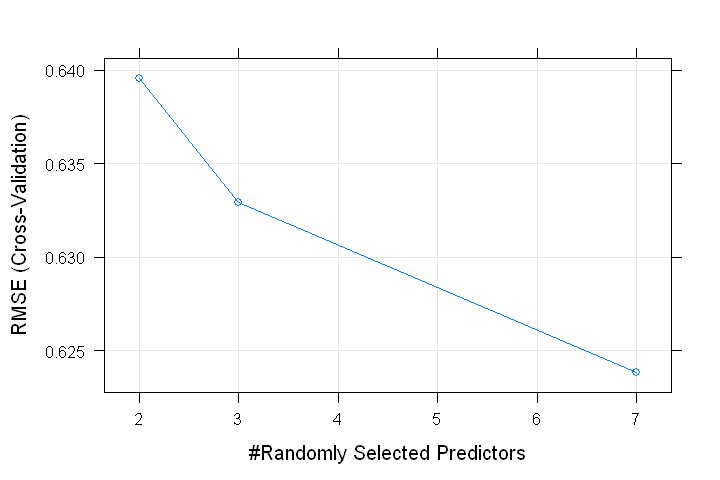

In [99]:
# Print model to console
model

# Plot model
plot(model)

### Advantage of glmnet

What's the advantage of glmnet over regular glm models?
* glmnet models place constraints on your coefficients, which helps prevent overfitting.

### Make a custom trainControl

The wine quality dataset was a regression problem, but now you are looking at a classification problem. This is a simulated dataset based on the "don't overfit" competition on Kaggle a number of years ago.

Classification problems are a little more complicated than regression problems because you have to provide a custom summaryFunction to the `train()` function to use the AUC metric to rank your models. Start by making a custom trainControl, as you did in the previous chapter. Be sure to set `classProbs = TRUE`, otherwise the twoClassSummary for summaryFunction will break.

In [100]:
# Create custom trainControl: myControl
myControl <- trainControl(
  method = "cv", number = 10,
  summaryFunction = twoClassSummary,
  classProbs = TRUE, # IMPORTANT!
  verboseIter = TRUE
)

### Fit glmnet with custom trainControl

Now that you have a custom trainControl object, fit a glmnet model to the "don't overfit" dataset. Recall from the video that glmnet is an extension of the generalized linear regression model (or glm) that places constraints on the magnitude of the coefficients to prevent overfitting. This is more commonly known as "penalized" regression modeling and is a very useful technique on datasets with many predictors and few values.

glmnet is capable of fitting two different kinds of penalized models, controlled by the alpha parameter:

* Ridge regression (or alpha = 0)
* Lasso regression (or alpha = 1)

You'll now fit a glmnet model to the "don't overfit" dataset using the defaults provided by the caret package.

In [104]:
overfit <- read_csv("overfit.csv")
overfit$y <- factor(overfit$y, levels = c("class1", "class2"))

Parsed with column specification:
cols(
  .default = col_double(),
  y = col_character()
)
See spec(...) for full column specifications.


In [105]:
str(overfit)

Classes 'tbl_df', 'tbl' and 'data.frame':	250 obs. of  201 variables:
 $ y   : Factor w/ 2 levels "class1","class2": 2 2 2 1 2 2 2 2 2 2 ...
 $ X1  : num  0.915 0.937 0.286 0.83 0.642 ...
 $ X2  : num  0.3342 0.1884 0.2697 0.5307 0.0215 ...
 $ X3  : num  0.137 0.177 0.52 0.811 0.115 ...
 $ X4  : num  0.2449 0.0876 0.3911 0.1826 0.1336 ...
 $ X5  : num  0.8483 0.0627 0.8198 0.5394 0.499 ...
 $ X6  : num  0.7359 0.7518 0.3326 0.0575 0.6744 ...
 $ X7  : num  0.0539 0.9551 0.0256 0.9208 0.3667 ...
 $ X8  : num  0.165 0.728 0.206 0.586 0.914 ...
 $ X9  : num  0.99 0.438 0.7 0.889 0.834 ...
 $ X10 : num  0.246 0.023 0.284 0.813 0.719 ...
 $ X11 : num  0.0604 0.933 0.3489 0.4118 0.9611 ...
 $ X12 : num  0.409 0.316 0.495 0.649 0.65 ...
 $ X13 : num  0.274 0.944 0.446 0.542 0.162 ...
 $ X14 : num  0.313 0.689 0.532 0.76 0.65 ...
 $ X15 : num  0.199 0.566 0.168 0.944 0.504 ...
 $ X16 : num  0.856 0.217 0.317 0.541 0.43 ...
 $ X17 : num  0.5989 0.9689 0.3905 0.8528 0.0423 ...
 $ X18 : num  0.364

In [107]:
# Fit glmnet model: model
model <- train(
  y ~ . , overfit,
  method = "glmnet",
  trControl = myControl
)

Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."

+ Fold01: alpha=0.10, lambda=0.01013 
- Fold01: alpha=0.10, lambda=0.01013 
+ Fold01: alpha=0.55, lambda=0.01013 
- Fold01: alpha=0.55, lambda=0.01013 
+ Fold01: alpha=1.00, lambda=0.01013 
- Fold01: alpha=1.00, lambda=0.01013 
+ Fold02: alpha=0.10, lambda=0.01013 
- Fold02: alpha=0.10, lambda=0.01013 
+ Fold02: alpha=0.55, lambda=0.01013 
- Fold02: alpha=0.55, lambda=0.01013 
+ Fold02: alpha=1.00, lambda=0.01013 
- Fold02: alpha=1.00, lambda=0.01013 
+ Fold03: alpha=0.10, lambda=0.01013 
- Fold03: alpha=0.10, lambda=0.01013 
+ Fold03: alpha=0.55, lambda=0.01013 
- Fold03: alpha=0.55, lambda=0.01013 
+ Fold03: alpha=1.00, lambda=0.01013 
- Fold03: alpha=1.00, lambda=0.01013 
+ Fold04: alpha=0.10, lambda=0.01013 
- Fold04: alpha=0.10, lambda=0.01013 
+ Fold04: alpha=0.55, lambda=0.01013 
- Fold04: alpha=0.55, lambda=0.01013 
+ Fold04: alpha=1.00, lambda=0.01013 
- Fold04: alpha=1.00, lambda=0.01013 
+ Fold05: alpha=0.10, lambda=0.01013 
- Fold05: alpha=0.10, lambda=0.01013 
+ Fold05: al

In [108]:
# Print model to console
model

# Print maximum ROC statistic
max(model[["results"]])

glmnet 

250 samples
200 predictors
  2 classes: 'class1', 'class2' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 226, 226, 225, 225, 225, 224, ... 
Resampling results across tuning parameters:

  alpha  lambda        ROC        Sens  Spec     
  0.10   0.0001012745  0.4731884  0.05  0.9655797
  0.10   0.0010127448  0.4774457  0.05  0.9699275
  0.10   0.0101274483  0.4904891  0.00  0.9827899
  0.55   0.0001012745  0.4586051  0.05  0.9568841
  0.55   0.0010127448  0.4586051  0.00  0.9610507
  0.55   0.0101274483  0.4998188  0.00  0.9871377
  1.00   0.0001012745  0.4107790  0.00  0.9353261
  1.00   0.0010127448  0.4108696  0.00  0.9525362
  1.00   0.0101274483  0.4287138  0.00  0.9869565

ROC was used to select the optimal model using the largest value.
The final values used for the model were alpha = 0.55 and lambda = 0.01012745.

[1] 1

### Why a custom tuning grid?

Why use a custom tuning grid for a glmnet model?
* The default tuning grid is very small and there are many more potential glmnet models you want to explore.

### glmnet with custom trainControl and tuning

As you saw in the video, the glmnet model actually fits many models at once (one of the great things about the package). You can exploit this by passing a large number of `lambda` values, which control the amount of penalization in the model. `train()` is smart enough to only fit one model per alpha value and pass all of the lambda values at once for simultaneous fitting.

My favorite tuning grid for glmnet models is:

    expand.grid(alpha = 0:1,
      lambda = seq(0.0001, 1, length = 100))

This grid explores a large number of lambda values (100, in fact), from a very small one to a very large one. (You could increase the maximum lambda to 10, but in this exercise 1 is a good upper bound.)

If you want to explore fewer models, you can use a shorter lambda sequence. For example, `lambda = seq(0.0001, 1, length = 10)` would fit 10 models per value of alpha.

You also look at the two forms of penalized models with this tuneGrid: ridge regression and lasso regression. `alpha = 0` is pure ridge regression, and `alpha = 1` is pure lasso regression. You can fit a mixture of the two models (i.e. an elastic net) using an alpha between 0 and 1. For example, alpha = .05 would be 95% ridge regression and 5% lasso regression.

In this problem you'll just explore the 2 extremes--pure ridge and pure lasso regression--for the purpose of illustrating their differences.

In [109]:
# Train glmnet with custom trainControl and tuning: model
model <- train(
  y ~ . , overfit,
  tuneGrid = expand.grid(alpha = 0:1, lambda = seq(0.0001, 1, length = 20)),
  method = "glmnet",
  trControl = myControl
)

Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."

+ Fold01: alpha=0, lambda=1 
- Fold01: alpha=0, lambda=1 
+ Fold01: alpha=1, lambda=1 
- Fold01: alpha=1, lambda=1 
+ Fold02: alpha=0, lambda=1 
- Fold02: alpha=0, lambda=1 
+ Fold02: alpha=1, lambda=1 
- Fold02: alpha=1, lambda=1 
+ Fold03: alpha=0, lambda=1 
- Fold03: alpha=0, lambda=1 
+ Fold03: alpha=1, lambda=1 
- Fold03: alpha=1, lambda=1 
+ Fold04: alpha=0, lambda=1 
- Fold04: alpha=0, lambda=1 
+ Fold04: alpha=1, lambda=1 
- Fold04: alpha=1, lambda=1 
+ Fold05: alpha=0, lambda=1 
- Fold05: alpha=0, lambda=1 
+ Fold05: alpha=1, lambda=1 
- Fold05: alpha=1, lambda=1 
+ Fold06: alpha=0, lambda=1 
- Fold06: alpha=0, lambda=1 
+ Fold06: alpha=1, lambda=1 
- Fold06: alpha=1, lambda=1 
+ Fold07: alpha=0, lambda=1 
- Fold07: alpha=0, lambda=1 
+ Fold07: alpha=1, lambda=1 
- Fold07: alpha=1, lambda=1 
+ Fold08: alpha=0, lambda=1 
- Fold08: alpha=0, lambda=1 
+ Fold08: alpha=1, lambda=1 
- Fold08: alpha=1, lambda=1 
+ Fold09: alpha=0, lambda=1 
- Fold09: alpha=0, lambda=1 
+ Fold09: alph

In [110]:
# Print model to console
model

# Print maximum ROC statistic
max(model[["results"]][["ROC"]])


glmnet 

250 samples
200 predictors
  2 classes: 'class1', 'class2' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 225, 225, 224, 225, 225, 226, ... 
Resampling results across tuning parameters:

  alpha  lambda      ROC        Sens  Spec     
  0      0.00010000  0.4391304  0.00  0.9744565
  0      0.05272632  0.4385870  0.00  0.9871377
  0      0.10535263  0.4470109  0.00  1.0000000
  0      0.15797895  0.4465580  0.00  1.0000000
  0      0.21060526  0.4528986  0.00  1.0000000
  0      0.26323158  0.4570652  0.00  1.0000000
  0      0.31585789  0.4614130  0.00  1.0000000
  0      0.36848421  0.4635870  0.00  1.0000000
  0      0.42111053  0.4656703  0.00  1.0000000
  0      0.47373684  0.4678442  0.00  1.0000000
  0      0.52636316  0.4678442  0.00  1.0000000
  0      0.57898947  0.4699275  0.00  1.0000000
  0      0.63161579  0.4742754  0.00  1.0000000
  0      0.68424211  0.4764493  0.00  1.0000000
  0      0.73686842  0.4785326  0.00  1.0000000

[1] 0.5

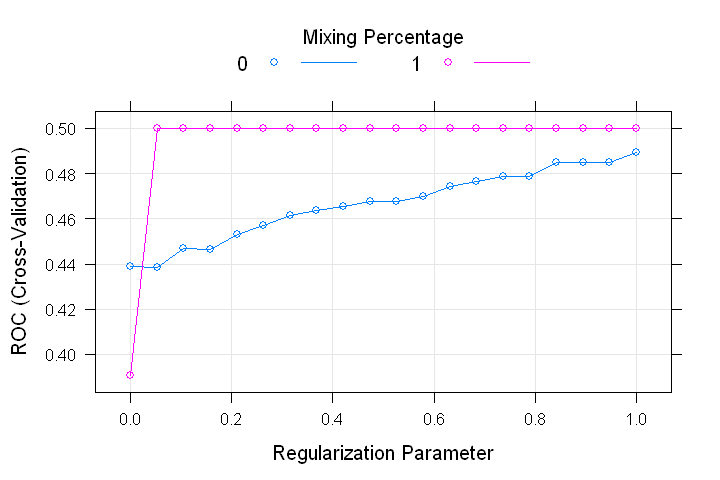

In [111]:
plot(model)

### Advantage of random forests

Here's the tuning plot for the custom tuned glmnet model you created in the last exercise. For the overfit dataset, which value of alpha is better?
* alpha = 1 (lasso)

### Median imputation vs. omitting rows

What's the value of median imputation?
* It lets you model data with missing values.

### Apply median imputation

In this chapter, you'll be using a version of the Wisconsin Breast Cancer dataset. This dataset presents a classic binary classification problem: 50% of the samples are benign, 50% are malignant, and the challenge is to identify which are which.

This dataset is interesting because many of the predictors contain missing values and most rows of the dataset have at least one missing value. This presents a modeling challenge, because most machine learning algorithms cannot handle missing values out of the box. For example, your first instinct might be to fit a logistic regression model to this data, but prior to doing this you need a strategy for handling the `NAs`.

Fortunately, the `train()` function in caret contains an argument called preProcess, which allows you to specify that median imputation should be used to fill in the missing values. In previous chapters, you created models with the `train()` function using formulas such as `y ~ .`. An alternative way is to specify the `x` and `y` arguments to `train()`, where `x` is an object with samples in rows and features in columns and `y` is a numeric or factor vector containing the outcomes. Said differently, `x` is a matrix or data frame that contains the whole dataset you'd use for the data argument to the `lm()` call, for example, but excludes the response variable column; `y` is a vector that contains just the response variable column.

In [113]:
load("BreastCancer.RData")

In [116]:
ls()

[1] "bins"            "Boston"          "boston_scaled"   "breast_cancer_x"
 [5] "breast_cancer_y" "cor_matrix"      "correct_classes" "crime"          
 [9] "diamonds"        "error"           "ind"             "m_or_r"         
[13] "model"           "myControl"       "n"               "overfit"        
[17] "p"               "p_class"         "rows"            "Sonar"          
[21] "sonar_test"      "sonar_train"     "split"           "test"           
[25] "train"           "tuneGrid"        "wine"

In [117]:
head(breast_cancer_x)
head(breast_cancer_y)

Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses
5,NA,1,1,NA,1,3,1,1
NA,4,4,NA,7,10,3,NA,1
NA,NA,1,1,2,NA,3,1,1
6,8,8,NA,NA,4,3,7,1
4,1,1,3,2,1,3,NA,1
8,10,10,8,7,10,NA,7,1


[1] benign    benign    benign    benign    benign    malignant
Levels: benign malignant

In [118]:
# Apply median imputation: model
model <- train(
  x = breast_cancer_x, y = breast_cancer_y,
  method = "glm",
  trControl = myControl,
  preProcess = "medianImpute"
)

Warning message in train.default(x = breast_cancer_x, y = breast_cancer_y, method = "glm", :
"The metric "Accuracy" was not in the result set. ROC will be used instead."

+ Fold01: parameter=none 
- Fold01: parameter=none 
+ Fold02: parameter=none 
- Fold02: parameter=none 
+ Fold03: parameter=none 
- Fold03: parameter=none 
+ Fold04: parameter=none 
- Fold04: parameter=none 
+ Fold05: parameter=none 
- Fold05: parameter=none 
+ Fold06: parameter=none 
- Fold06: parameter=none 
+ Fold07: parameter=none 
- Fold07: parameter=none 
+ Fold08: parameter=none 
- Fold08: parameter=none 
+ Fold09: parameter=none 
- Fold09: parameter=none 
+ Fold10: parameter=none 
- Fold10: parameter=none 
Aggregating results
Fitting final model on full training set


In [119]:
# Print model to console
model

Generalized Linear Model 

699 samples
  9 predictor
  2 classes: 'benign', 'malignant' 

Pre-processing: median imputation (9) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 628, 629, 630, 629, 630, 629, ... 
Resampling results:

  ROC        Sens       Spec
  0.9920845  0.9694203  0.95


### Comparing KNN imputation to median imputation

Will KNN imputation always be better than median imputation?
* No, you should try both options and keep the one that gives more accurate models.

### Use KNN imputation

In the previous exercise, you used median imputation to fill in missing values in the breast cancer dataset, but that is not the only possible method for dealing with missing data.

An alternative to median imputation is k-nearest neighbors, or KNN, imputation. This is a more advanced form of imputation where missing values are replaced with values from other rows that are similar to the current row. While this is a lot more complicated to implement in practice than simple median imputation, it is very easy to explore in caret using the `preProcess` argument to `train()`. You can simply use `preProcess = "knnImpute"` to change the method of imputation used prior to model fitting.

In [122]:
# Apply KNN imputation: model2
model2 <- train(
  x = breast_cancer_x, y = breast_cancer_y,
  method = "glm",
  trControl = myControl,
  preProcess = "knnImpute"
)

Warning message in train.default(x = breast_cancer_x, y = breast_cancer_y, method = "glm", :
"The metric "Accuracy" was not in the result set. ROC will be used instead."

+ Fold01: parameter=none 
- Fold01: parameter=none 
+ Fold02: parameter=none 
- Fold02: parameter=none 
+ Fold03: parameter=none 
- Fold03: parameter=none 
+ Fold04: parameter=none 
- Fold04: parameter=none 
+ Fold05: parameter=none 
- Fold05: parameter=none 
+ Fold06: parameter=none 
- Fold06: parameter=none 
+ Fold07: parameter=none 
- Fold07: parameter=none 
+ Fold08: parameter=none 
- Fold08: parameter=none 
+ Fold09: parameter=none 
- Fold09: parameter=none 
+ Fold10: parameter=none 
- Fold10: parameter=none 
Aggregating results
Fitting final model on full training set


In [123]:
# Print model to console
model2

Generalized Linear Model 

699 samples
  9 predictor
  2 classes: 'benign', 'malignant' 

Pre-processing: nearest neighbor imputation (9), centered (9), scaled (9) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 629, 629, 629, 630, 629, 629, ... 
Resampling results:

  ROC        Sens       Spec 
  0.9926647  0.9694686  0.934


### Compare KNN and median imputation

All of the preprocessing steps in the `train()` function happen in the training set of each cross-validation fold, so the error metrics reported include the effects of the preprocessing.

This includes the imputation method used (e.g. `knnImpute` or `medianImpute`). This is useful because it allows you to compare different methods of imputation and choose the one that performs the best out-of-sample.

median_model and knn_model are available in your workspace, as is resamples, which contains the resampled results of both models. Look at the results of the models by calling

    dotplot(resamples, metric = "ROC")

and choose the one that performs the best out-of-sample. Which method of imputation yields the highest out-of-sample ROC score for your glm model?

### Order of operations

Which comes first in caret's `preProcess()` function: median imputation or centering and scaling of variables?
* Median imputation comes before centering and scaling.

### Combining preprocessing methods

The preProcess argument to `train()` doesn't just limit you to imputing missing values. It also includes a wide variety of other preProcess techniques to make your life as a data scientist much easier. You can read a full list of them by typing ?preProcess and reading the help page for this function.

One set of preprocessing functions that is particularly useful for fitting regression models is standardization: centering and scaling. You first center by subtracting the mean of each column from each value in that column, then you scale by dividing by the standard deviation.

Standardization transforms your data such that for each column, the mean is 0 and the standard deviation is 1. This makes it easier for regression models to find a good solution.

In [124]:
# Fit glm with median imputation: model1
model1 <- train(
  x = breast_cancer_x, y = breast_cancer_y,
  method = "glm",
  trControl = myControl,
  preProcess = "medianImpute"
)

Warning message in train.default(x = breast_cancer_x, y = breast_cancer_y, method = "glm", :
"The metric "Accuracy" was not in the result set. ROC will be used instead."

+ Fold01: parameter=none 
- Fold01: parameter=none 
+ Fold02: parameter=none 
- Fold02: parameter=none 
+ Fold03: parameter=none 
- Fold03: parameter=none 
+ Fold04: parameter=none 
- Fold04: parameter=none 
+ Fold05: parameter=none 
- Fold05: parameter=none 
+ Fold06: parameter=none 
- Fold06: parameter=none 
+ Fold07: parameter=none 
- Fold07: parameter=none 
+ Fold08: parameter=none 
- Fold08: parameter=none 
+ Fold09: parameter=none 
- Fold09: parameter=none 
+ Fold10: parameter=none 
- Fold10: parameter=none 
Aggregating results
Fitting final model on full training set


In [125]:
# Print model1
model1

Generalized Linear Model 

699 samples
  9 predictor
  2 classes: 'benign', 'malignant' 

Pre-processing: median imputation (9) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 629, 628, 629, 629, 630, 629, ... 
Resampling results:

  ROC        Sens       Spec 
  0.9917649  0.9695169  0.946


In [126]:
# Fit glm with median imputation and standardization: model2
model2 <- train(
  x = breast_cancer_x, y = breast_cancer_y,
  method = "glm",
  trControl = myControl,
  preProcess = c("medianImpute", "center", "scale")
)

Warning message in train.default(x = breast_cancer_x, y = breast_cancer_y, method = "glm", :
"The metric "Accuracy" was not in the result set. ROC will be used instead."

+ Fold01: parameter=none 
- Fold01: parameter=none 
+ Fold02: parameter=none 
- Fold02: parameter=none 
+ Fold03: parameter=none 
- Fold03: parameter=none 
+ Fold04: parameter=none 
- Fold04: parameter=none 
+ Fold05: parameter=none 
- Fold05: parameter=none 
+ Fold06: parameter=none 
- Fold06: parameter=none 
+ Fold07: parameter=none 
- Fold07: parameter=none 
+ Fold08: parameter=none 
- Fold08: parameter=none 
+ Fold09: parameter=none 
- Fold09: parameter=none 
+ Fold10: parameter=none 
- Fold10: parameter=none 
Aggregating results
Fitting final model on full training set


In [127]:
# Print model2
model2

Generalized Linear Model 

699 samples
  9 predictor
  2 classes: 'benign', 'malignant' 

Pre-processing: median imputation (9), centered (9), scaled (9) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 629, 629, 629, 629, 629, 629, ... 
Resampling results:

  ROC        Sens       Spec 
  0.9918699  0.9671498  0.942


### Why remove near zero variance predictors?

What's the best reason to remove near zero variance predictors from your data before building a model?
* To reduce model-fitting time without reducing model accuracy.

### Remove near zero variance predictors

As you saw in the video, for the next set of exercises, you'll be using the blood-brain dataset. This is a biochemical dataset in which the task is to predict the following value for a set of biochemical compounds:

    log((concentration of compound in brain) /
          (concentration of compound in blood))

This gives a quantitative metric of the compound's ability to cross the blood-brain barrier, and is useful for understanding the biological properties of that barrier.

One interesting aspect of this dataset is that it contains many variables and many of these variables have extemely low variances. This means that there is very little information in these variables because they mostly consist of a single value (e.g. zero).

Fortunately, caret contains a utility function called `nearZeroVar()` for removing such variables to save time during modeling.

`nearZeroVar()` takes in data `x`, then looks at the ratio of the most common value to the second most common value, `freqCut`, and the percentage of distinct values out of the number of total samples, `uniqueCut`. By default, caret uses `freqCut = 19` and `uniqueCut = 10`, which is fairly conservative. I like to be a little more aggressive and use `freqCut = 2` and `uniqueCut = 20` when calling `nearZeroVar()`.

In [128]:
load("BloodBrain.rdata") bloodbrain_x bloodbrain_y

In [130]:
# Identify near zero variance predictors: remove_cols
remove_cols <- nearZeroVar(bloodbrain_x, names = TRUE, 
                           freqCut = 2, uniqueCut = 20)

# Get all column names from bloodbrain_x: all_cols
all_cols <- names(bloodbrain_x)

# Remove from data: bloodbrain_x_small
bloodbrain_x_small <- bloodbrain_x[ , setdiff(all_cols, remove_cols)]

### preProcess() and nearZeroVar()

Can you use the `preProcess` argument in caret to remove near-zero variance predictors? Or do you have to do this by hand, prior to modeling, using the `nearZeroVar()` function?
* Yes! Set the preProcess argument equal to "nzv".

### Fit model on reduced blood-brain data

Now that you've reduced your dataset, you can fit a glm model to it using the `train()` function. This model will run faster than using the full dataset and will yield very similar predictive accuracy.

Furthermore, zero variance variables can cause problems with cross-validation (e.g. if one fold ends up with only a single unique value for that variable), so removing them prior to modeling means you are less likely to get errors during the fitting process.

In [131]:
# Fit model on reduced data: model
model <- train(x = bloodbrain_x_small, y = bloodbrain_y, method = "glm")

# Print model to console
model

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient 

Generalized Linear Model 

208 samples
112 predictors

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 208, 208, 208, 208, 208, 208, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  1.734699  0.1145815  1.131483


# Principal component analysis (PCA)
### Using PCA as an alternative to nearZeroVar()

An alternative to removing low-variance predictors is to run PCA on your dataset. This is sometimes preferable because it does not throw out all of your data: many different low variance predictors may end up combined into one high variance PCA variable, which might have a positive impact on your model's accuracy.

This is an especially good trick for linear models: the pca option in the preProcess argument will center and scale your data, combine low variance variables, and ensure that all of your predictors are orthogonal. This creates an ideal dataset for linear regression modeling, and can often improve the accuracy of your models.

In [132]:
# Fit glm model using PCA: model
model <- train(
  x = bloodbrain_x, y = bloodbrain_y,
  method = "glm", preProcess = "pca"
)

# Print model to console
model

Generalized Linear Model 

208 samples
132 predictors

Pre-processing: principal component signal extraction (132), centered
 (132), scaled (132) 
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 208, 208, 208, 208, 208, 208, ... 
Resampling results:

  RMSE       Rsquared   MAE   
  0.6180152  0.4199532  0.4595


Note that the PCA model's accuracy is slightly higher than the nearZeroVar() model from the previous exercise. PCA is generally a better method for handling low-information predictors than throwing them out entirely. 